Dataset Shape: (745305, 2)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 745305 entries, 0 to 745304
Data columns (total 2 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                745305 non-null  int64  
 1   FloodProbability  745305 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 11.4 MB
None

Missing Values:
 id                  0
FloodProbability    0
dtype: int64

Statistical Summary:
                 id  FloodProbability
count  7.453050e+05          745305.0
mean   1.490609e+06               0.5
std    2.151512e+05               0.0
min    1.117957e+06               0.5
25%    1.304283e+06               0.5
50%    1.490609e+06               0.5
75%    1.676935e+06               0.5
max    1.863261e+06               0.5

Columns: ['id', 'FloodProbability']


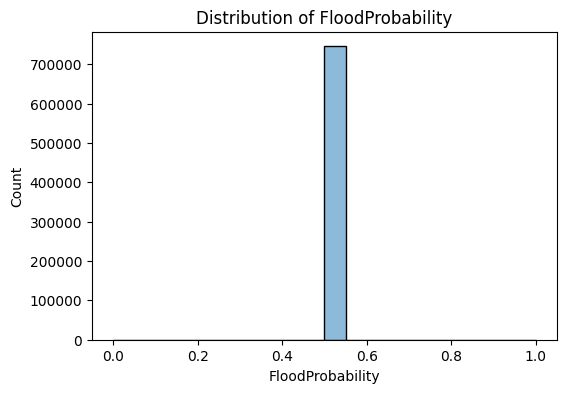

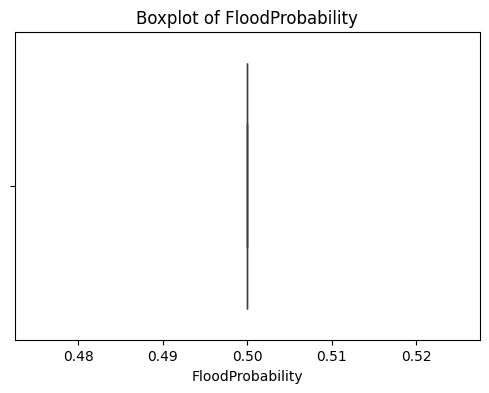

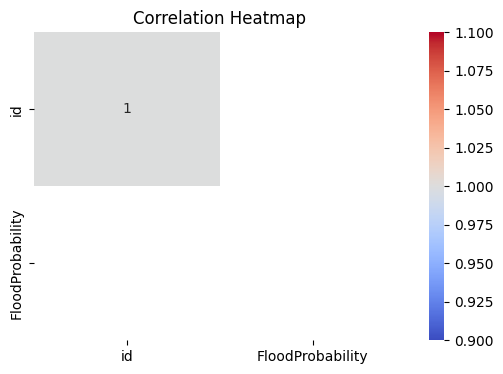


Data after transformation (first 5 rows):
         id  FloodProbability
0 -1.732048               0.0
1 -1.732044               0.0
2 -1.732039               0.0
3 -1.732035               0.0
4 -1.732030               0.0

⚠️ No features to select (only FloodProbability column present).


In [10]:
# -------------------------
# WEEK 2 PROJECT - Flood Prediction (EDA + Transformation + Feature Selection)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

data = pd.read_csv("/content/sample_submission.csv")


print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())
print("\nMissing Values:\n", data.isnull().sum())

print("\nStatistical Summary:")
print(data.describe())




print("\nColumns:", data.columns.tolist())


plt.figure(figsize=(6,4))
sns.histplot(data["FloodProbability"], bins=20, kde=True)
plt.title("Distribution of FloodProbability")
plt.show()


plt.figure(figsize=(6,4))
sns.boxplot(x=data["FloodProbability"])
plt.title("Boxplot of FloodProbability")
plt.show()


plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


data = data.fillna(data.mean())


le = LabelEncoder()
for col in data.select_dtypes(include="object").columns:
    data[col] = le.fit_transform(data[col])


scaler = StandardScaler()
num_cols = data.select_dtypes(include=["int64","float64"]).columns
data[num_cols] = scaler.fit_transform(data[num_cols])

print("\nData after transformation (first 5 rows):")
print(data.head())


target = "FloodProbability"
X = data.drop(["FloodProbability","id"], axis=1, errors='ignore')
y = data["FloodProbability"]

if X.shape[1] > 0:

    best_features = SelectKBest(score_func=f_classif, k="all")
    fit = best_features.fit(X, y)

    df_scores = pd.DataFrame(fit.scores_)
    df_columns = pd.DataFrame(X.columns)

    featureScores = pd.concat([df_columns, df_scores], axis=1)
    featureScores.columns = ["Feature","Score"]

    print("\nFeature Importance Scores:")
    print(featureScores.sort_values(by="Score", ascending=False))
else:
    print("\n⚠️ No features to select (only FloodProbability column present).")
